In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:/Users/Ali/Downloads/Automobile.csv')


<IPython.core.display.Javascript object>

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### For univariate Analysis use these types of classes.

In [4]:
class univariate:
    def __init__(self):
        print('Univariate Object created')
    def pie(cls, x, **kwargs):
        x.value_counts().plot.pie(autopct = '%1.1f%%', shadow= True)
    @staticmethod
    def countplot(x= None , y= None , h = None ,**kwargs):
        sns.countplot(x = x , y = y , hue=h)
        x = plt.xticks(rotation = 90)
    @staticmethod
    def barplot(x = None , y= None , h = None , **kwargs ):
        sns.barplot(x = x, y = y , hue=h )
        x = plt.xticks(rotation = 90)

In [5]:
### Bivariate class will also be the same as above just what we have to give is hue= value . You can also create another class
### which will show you the distplot along with box plot along with describe() command . So that you have all about variable at-
### once.

In [6]:
class cleaning:
    def __init__(self):
        print('Data Cleaning object created')
    def isnull(self, data):
        n1 = data.isnull().sum()
        return n1
    @staticmethod
    def isnullplot(data):
        sns.heatmap(data.isnull(), yticklabels=False)

In [7]:
sns.barplot(x=df['price'], y=df['make'])
x = plt.xticks(rotation = 90)
plt.tight_layout()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [9]:
df.price.value_counts()
df.price.replace('?',np.nan, inplace=True)
df['price'] = pd.to_numeric(df['price'])

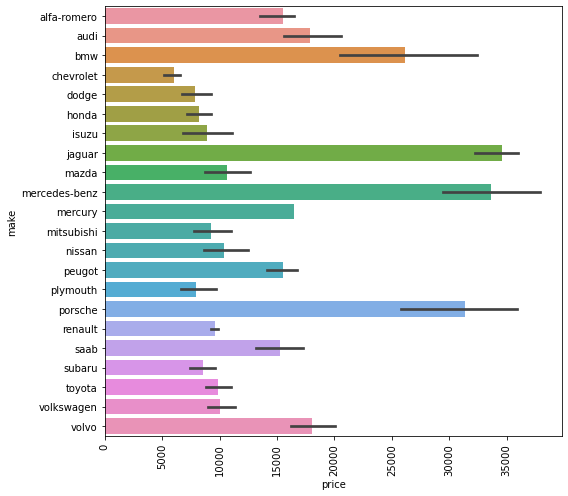

In [10]:
plt.figure(figsize=(8,7))
sns.barplot(x=df['price'], y=df['make'])
x = plt.xticks(rotation = 90)
plt.tight_layout()

#### Price is key parameter for predecting the price . 
###### What are top costly cars ?

1. So now here in above vizsualization , you have got some key insights . Again you have 10 more questions to answer just by
   seeing at this viz like ( what are top six cars? , what are most costly/cheap cars in top cars ? , Why they are top cars?
2. Again you have to notedown on notepad some questions related to this visualization and it's like a tree . You have even more
   questions as you continue to visualize/explore the Data.

In [12]:
df.horsepower.value_counts()
df.horsepower.replace('?',np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'])

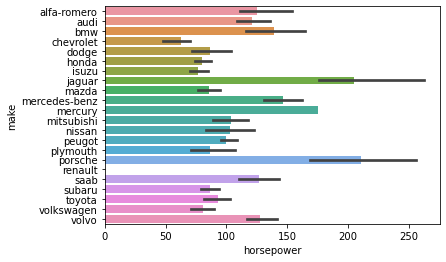

In [14]:
sns.barplot(df['horsepower'], df['make'])

#### Horsepower is impacted by cartype , again what you have to do is to check wheather horsepower is affected by price as well.
1. tip : ( Make price column as descrete like 1.luxury 2.Budget etc ) just to understand the relation B/W price and horsepower
   because then we'll understand those cars which have higher price most probably have high horsepower also.

In [15]:
df['car-range'] = df['price'].apply(lambda x : 'Budget' if x <= 10000
                                    else ('Mid-range' if 10000 <= x <= 20000 else 'Luxury'))

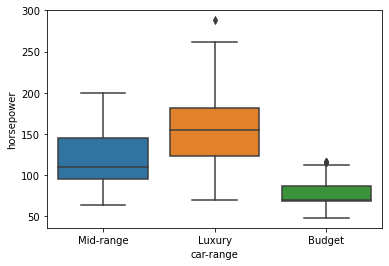

In [17]:
sns.boxplot(df['car-range'], df['horsepower'])

1. Now here again you've got some questions from this visualization like :
1. if it is budget then what are the min/max price in budget cars ?
2. if it is mid-range then what are cars that have high/less horsepower ? why they have even high horsepower as thier price is
3. mid-range and who are manufacturing them ?
4. Again for luxury what are the cars that have very high horsepower ? is there any other factors that are affecting the          horsepower ?
#### Do'nt conclude with 1 single plot until and unless you have got a clear picture of it ( below is a good example ).

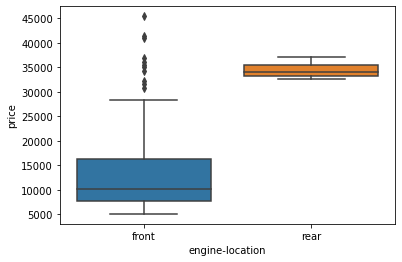

In [18]:
sns.boxplot(df['engine-location'], df['price'])

1. Now here you can't generalize the statement , you have to check which cars have rear-engine location , Does it really worth 
   to add as a feature in model ? 

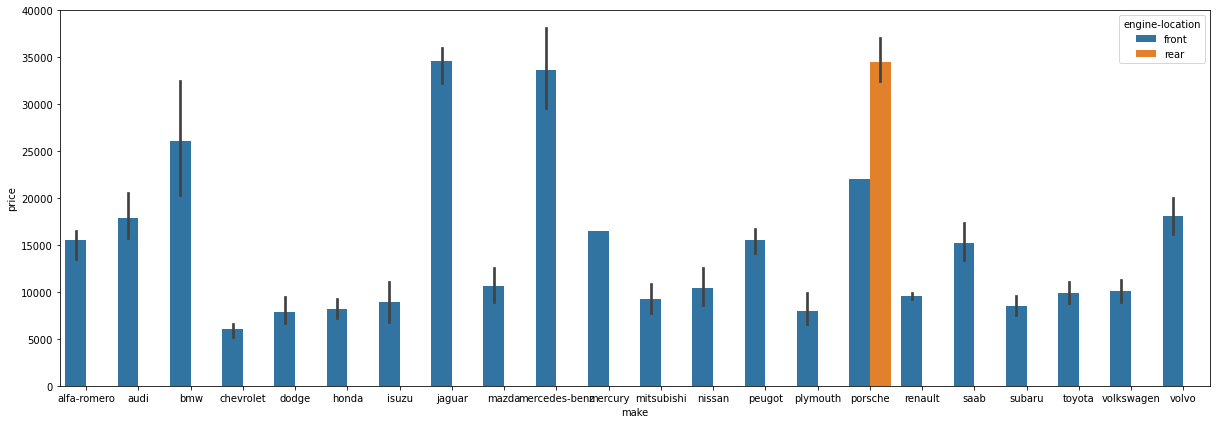

In [28]:
plt.figure(figsize=(17,6))
sns.barplot( x=df['make'],y=df['price'], hue=df['engine-location'])
plt.tight_layout()

##### Now here after checking by this plot you can now genralize the statement that engine-location is not impacting , as all cars have front engine location except porshe.